In [11]:
no <- 1:4
name <- c("Apple", "Banana", "Peach", "Berry")
price <- c(500, 200, 200, 50)
qty <- c(5, 4, 4, 2)

In [12]:
# 벡터를 이용하여 데이터 프레임 만들기
fruit <- data.frame(번호=no, 제품=name, 금액=price, 수량=qty)
fruit

번호,제품,금액,수량
1,Apple,500,5
2,Banana,200,4
3,Peach,200,4
4,Berry,50,2


In [13]:
# 현재 메모리에 있는 변수 보기
ls()

[1] "fruit" "name"  "no"    "price" "qty"

In [14]:
# 메모리 형태로 파일 보관

save(no, fruit, name, file="../Data/testFruit.txt")

In [15]:
rm(no, fruit, name)

In [16]:
ls()

[1] "price" "qty"

In [17]:
# 메모리에 불러오기
load("../Data/testFruit.txt")

In [18]:
fruit

번호,제품,금액,수량
1,Apple,500,5
2,Banana,200,4
3,Peach,200,4
4,Berry,50,2


In [22]:
# fruit를 csv로 저장하기

write.csv(fruit, "../Data/fruit3.csv")

In [24]:
fruit2 <- read.csv("../Data//fruit.csv")
fruit2

X,번호,제품,금액,수량
1,1,Apple,500,5
2,2,Banana,200,4
3,3,Peach,200,4
4,4,Berry,50,2


In [25]:
write.csv(fruit2, "../Data/furit2.csv")

In [26]:
read.csv("../Data//furit2.csv")

X.1,X,번호,제품,금액,수량
1,1,1,Apple,500,5
2,2,2,Banana,200,4
3,3,3,Peach,200,4
4,4,4,Berry,50,2


In [27]:
# 저장시 주의 사항 : row names가 필요치 않으면 저장하지 말아야 한다.

write.csv(fruit, "../Data/fruit.csv", row.names=F) # row.name=F를 사용해야 불필요한 인덱스가 추가되지 않는다

In [28]:
read.csv("../Data//fruit.csv")

번호,제품,금액,수량
1,Apple,500,5
2,Banana,200,4
3,Peach,200,4
4,Berry,50,2


---
# 세계 GDP 순위 데이터 정제 및 차트 만들기

In [175]:
# Data Set 불러오기
GDP_ranking <- read.csv("../Data//GDP.csv")

In [176]:
head(GDP_ranking, 10)

X,Gross.domestic.product.2018,X.1,X.2,X.3,X.4
,,NA,,,
,,NA,,(millions of,
,Ranking,NA,Economy,US dollars),
,,NA,,,
USA,1,NA,United States,"20,494,100",
CHN,2,NA,China,"13,608,152",
JPN,3,NA,Japan,"4,970,916",
DEU,4,NA,Germany,"3,996,759",
GBR,5,NA,United Kingdom,"2,825,208",
FRA,6,NA,France,"2,777,535",


In [177]:
# 1~4줄 삭제, (1,2,3,4,5) 컬럼만 발췌
GDP_ranking2 <- GDP_ranking[-c(1:4), c(1,2,4,5)]

In [178]:
# 상위 15개국만 선별한다
GDP_ranking15 <- head(GDP_ranking2, 15)


In [179]:
# 컬럼 이름 정의 : Code, Ranking, Nation, GDP
colnames(GDP_ranking15) <- c("Code", "Ranking", "Nation", "GDP")
GDP_ranking15

,Code,Ranking,Nation,GDP
5,USA,1,United States,"20,494,100"
6,CHN,2,China,"13,608,152"
7,JPN,3,Japan,"4,970,916"
8,DEU,4,Germany,"3,996,759"
9,GBR,5,United Kingdom,"2,825,208"
10,FRA,6,France,"2,777,535"
11,IND,7,India,"2,726,323"
12,ITA,8,Italy,"2,073,902"
13,BRA,9,Brazil,"1,868,626"
14,CAN,10,Canada,"1,712,510"


In [180]:
# rownames 새로 구성하기
rownames(GDP_ranking15) <- c()
print(GDP_ranking15)

   Code Ranking             Nation          GDP
1   USA       1      United States  20,494,100 
2   CHN       2              China  13,608,152 
3   JPN       3              Japan   4,970,916 
4   DEU       4            Germany   3,996,759 
5   GBR       5     United Kingdom   2,825,208 
6   FRA       6             France   2,777,535 
7   IND       7              India   2,726,323 
8   ITA       8              Italy   2,073,902 
9   BRA       9             Brazil   1,868,626 
10  CAN      10             Canada   1,712,510 
11  RUS      11 Russian Federation   1,657,554 
12  KOR      12        Korea, Rep.   1,619,424 
13  AUS      13          Australia   1,432,195 
14  ESP      14              Spain   1,426,189 
15  MEX      15             Mexico   1,223,809 


In [181]:
# 구조 확인하기
str(GDP_ranking15)  # 옛날 헤더를 그대로 가지고 있다

'data.frame':	15 obs. of  4 variables:
 $ Code   : Factor w/ 230 levels "","ABW","AFG",..: 216 38 103 52 72 68 94 100 28 34 ...
 $ Ranking: Factor w/ 212 levels "",".. Not available.  ",..: 3 114 131 142 153 164 175 186 197 4 ...
 $ Nation : Factor w/ 231 levels "","Afghanistan",..: 219 43 104 78 218 73 95 102 28 37 ...
 $ GDP    : Factor w/ 220 levels ""," .. "," 1,022 ",..: 78 44 137 113 77 75 74 67 20 19 ...


In [182]:
# Factor의 갯수가 15개가 정상일텐데 이상하다. -> 재구성
GDP_ranking15$Code <- factor(GDP_ranking15$Code)

In [183]:
# for문을 이용한 factor 조정
for(i in 1:ncol(GDP_ranking15)) {
    GDP_ranking15[,i] = factor(GDP_ranking15[,i])  # 재구성
}

In [184]:
str(GDP_ranking15)

'data.frame':	15 obs. of  4 variables:
 $ Code   : Factor w/ 15 levels "AUS","BRA","CAN",..: 15 4 11 5 8 7 9 10 2 3 ...
 $ Ranking: Factor w/ 15 levels "1","10","11",..: 1 8 9 10 11 12 13 14 15 2 ...
 $ Nation : Factor w/ 15 levels "Australia","Brazil",..: 15 4 9 6 14 5 7 8 2 3 ...
 $ GDP    : Factor w/ 15 levels " 1,223,809 ",..: 13 8 15 14 12 11 10 9 7 6 ...


In [185]:
print(GDP_ranking15)

   Code Ranking             Nation          GDP
1   USA       1      United States  20,494,100 
2   CHN       2              China  13,608,152 
3   JPN       3              Japan   4,970,916 
4   DEU       4            Germany   3,996,759 
5   GBR       5     United Kingdom   2,825,208 
6   FRA       6             France   2,777,535 
7   IND       7              India   2,726,323 
8   ITA       8              Italy   2,073,902 
9   BRA       9             Brazil   1,868,626 
10  CAN      10             Canada   1,712,510 
11  RUS      11 Russian Federation   1,657,554 
12  KOR      12        Korea, Rep.   1,619,424 
13  AUS      13          Australia   1,432,195 
14  ESP      14              Spain   1,426,189 
15  MEX      15             Mexico   1,223,809 


In [186]:
library(stringr)

In [187]:
GDP_ranking15$GDP <- as.numeric(str_remove_all(GDP_ranking15$GDP, ","))  # factor에서 바로 지울수 있다
str(GDP_ranking15)

'data.frame':	15 obs. of  4 variables:
 $ Code   : Factor w/ 15 levels "AUS","BRA","CAN",..: 15 4 11 5 8 7 9 10 2 3 ...
 $ Ranking: Factor w/ 15 levels "1","10","11",..: 1 8 9 10 11 12 13 14 15 2 ...
 $ Nation : Factor w/ 15 levels "Australia","Brazil",..: 15 4 9 6 14 5 7 8 2 3 ...
 $ GDP    : num  20494100 13608152 4970916 3996759 2825208 ...


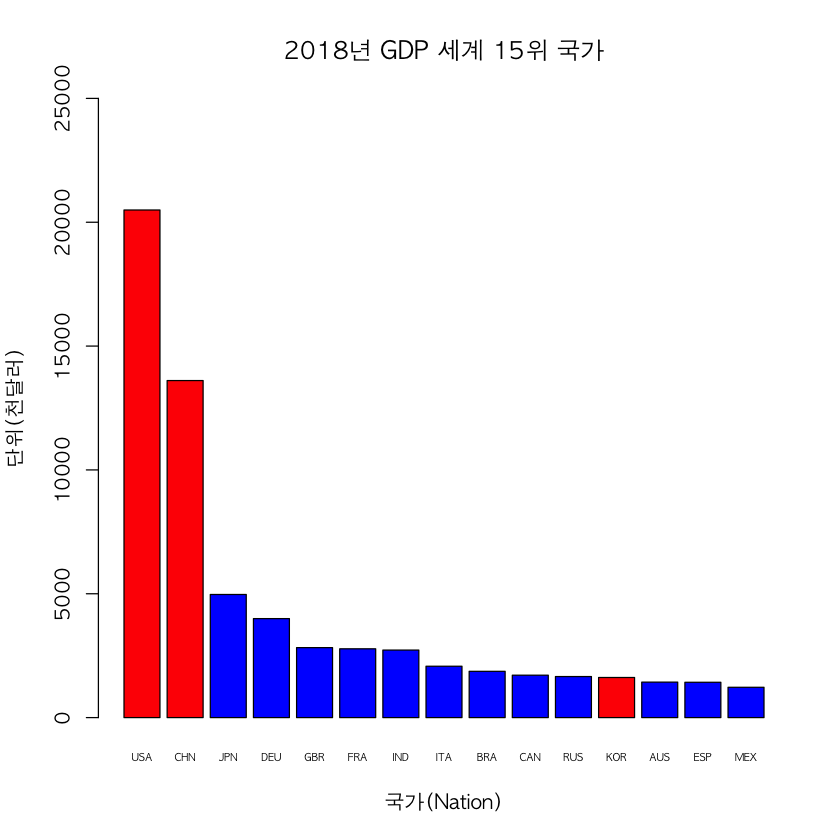

In [243]:
options(scipen = 100)
options(warn = -1) # Warning 삭제
par(family = "AppleGothic") # 한글폰트

barplot(GDP_ranking15$GDP/1000, # GDP상위 15개국 Data
        main = "2018년 GDP 세계 15위 국가",
        xlab = "국가(Nation)",
        ylab = "단위(천달러)",
        names = GDP_ranking15$Code,
        cex.names = 0.5,
        col = c(rep('red', 2), rep('blue',9),'red',rep('blue', 3)),
        ç
        #col = rainbow(nrow(GDP_ranking15))
       )

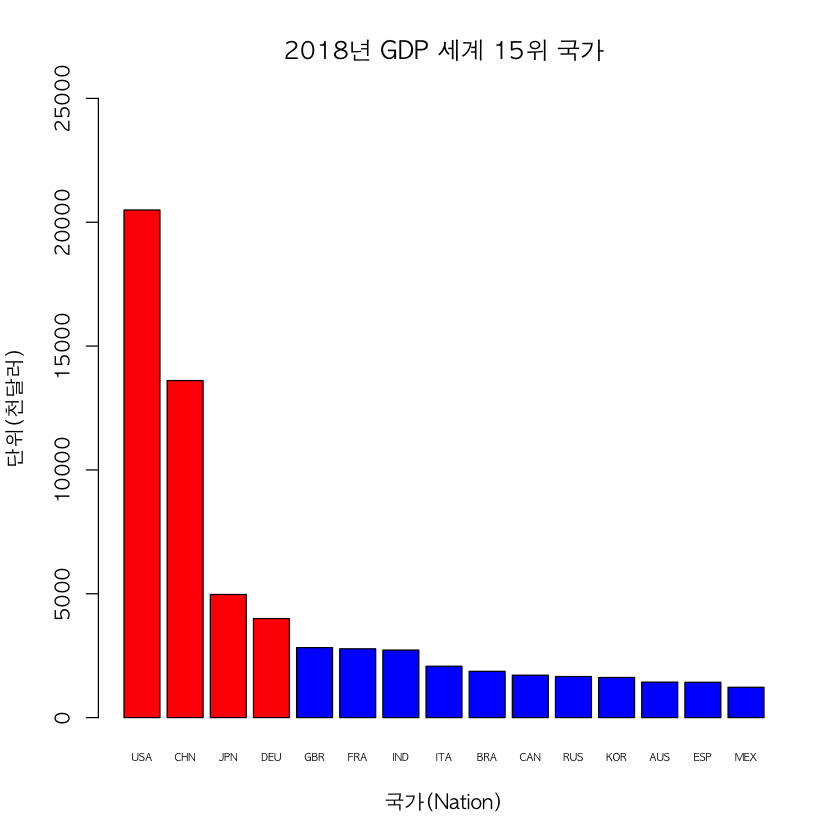

In [250]:
# GDP가 3000 이상인 국가만 빨간색으로 표시하기
par(family = "AppleGothic") # 한글폰트

barplot(GDP_ranking15$GDP/1000, # GDP상위 15개국 Data
        main = "2018년 GDP 세계 15위 국가",
        xlab = "국가(Nation)",
        ylab = "단위(천달러)",
        names = GDP_ranking15$Code,
        cex.names = 0.5,
        col = ifelse((GDP_ranking15$GDP/1000> 3000), 'red', 'blue'),
        ylim = c(0, 25000)
       )

---
# 데이터 처리

In [253]:
# 데이터 처리

library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [256]:
# Speal.Length 기준으로 오름차순 정렬하기

head(arrange(iris, Sepal.Length))


Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
4.3,3.0,1.1,0.1,setosa
4.4,2.9,1.4,0.2,setosa
4.4,3.0,1.3,0.2,setosa
4.4,3.2,1.3,0.2,setosa
4.5,2.3,1.3,0.3,setosa
4.6,3.1,1.5,0.2,setosa


In [259]:
# Sepal.Length기준으로 정렬후 동일한 크기를 가진 데이터 발생시 Petal.Length기준으로 오름차순 정렬

head(arrange(iris, Sepal.Length, Petal.Length))

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
4.3,3.0,1.1,0.1,setosa
4.4,3.0,1.3,0.2,setosa
4.4,3.2,1.3,0.2,setosa
4.4,2.9,1.4,0.2,setosa
4.5,2.3,1.3,0.3,setosa
4.6,3.6,1.0,0.2,setosa


In [261]:
# Sepal.Length기준으로 내림차순 정렬

head(arrange(iris, desc(Sepal.Length)))

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
7.9,3.8,6.4,2.0,virginica
7.7,3.8,6.7,2.2,virginica
7.7,2.6,6.9,2.3,virginica
7.7,2.8,6.7,2.0,virginica
7.7,3.0,6.1,2.3,virginica
7.6,3.0,6.6,2.1,virginica


In [269]:
# Sepal.Length기준으로 내림차순 정렬후, Sepal.Length와 Sepal.Wdith만 보기

head(arrange(iris[,1:2], desc(Sepal.Length))) # 구문의 iris 위치가 범위

Sepal.Length,Sepal.Width
7.9,3.8
7.7,3.8
7.7,2.6
7.7,2.8
7.7,3.0
7.6,3.0


---
# 샘플링(Sampling)

In [279]:
# 랜덤 샘플링(중복값을 허용하지 않음)
sample(1:45, 6)

[1] 27 28  9 12 35 34

In [281]:
nrow(iris)
ncol(iris)

[1] 150

[1] 5

In [290]:
samp <- sample(1:nrow(iris), nrow(iris)*0.7)
samp

[1]   9  28 149  58  82  34  83  80 114  73 109  30 111  14  35 102 138  33
 [19] 118  36 135 140  31  86 142  84  29 148  75 130  39  46 131  66  24 117
 [37]  92  71  77  21   6   8  41 121 106  38 120 128  23  43 126  56 107   2
 [55] 100 127 104 103  96  27  61  47  65 116   4  55 134 133  95  17  16 123
 [73]   3 101 105  25 119 141  99  52  87   1 145 139  89 147  42  40 122  51
 [91]  67 143  68 146 144  79  78  20  22  10  98 110 150   5  54

In [292]:
irisSamp <- iris[samp,]
head(irisSamp)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
9,4.4,2.9,1.4,0.2,setosa
28,5.2,3.5,1.5,0.2,setosa
149,6.2,3.4,5.4,2.3,virginica
58,4.9,2.4,3.3,1.0,versicolor
82,5.5,2.4,3.7,1.0,versicolor
34,5.5,4.2,1.4,0.2,setosa


In [293]:
summary(irisSamp)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.500   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.500   Median :1.400  
 Mean   :5.843   Mean   :3.067   Mean   :3.807   Mean   :1.228  
 3rd Qu.:6.500   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.700   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :35  
 versicolor:30  
 virginica :40  
                
                
                

In [294]:
table(irisSamp$Species)


    setosa versicolor  virginica 
        35         30         40 

In [302]:
# iris Samplingtl Sepcies별로 Sampling
samp <- c(sample(1:50, 35), sample(51:100, 35), sample(101:150, 35))


In [303]:
irisSamp <- iris[samp,]
table(irisSamp$Species)


    setosa versicolor  virginica 
        35         35         35 

In [309]:
# Training Data와 Test Data분리하기

iris.train <- iris[samp,]
iris.test <- iris[-samp,]

In [310]:
summary(iris.train)

  Sepal.Length    Sepal.Width    Petal.Length    Petal.Width          Species  
 Min.   :4.400   Min.   :2.20   Min.   :1.000   Min.   :0.100   setosa    :35  
 1st Qu.:5.100   1st Qu.:2.80   1st Qu.:1.600   1st Qu.:0.300   versicolor:35  
 Median :5.700   Median :3.00   Median :4.200   Median :1.300   virginica :35  
 Mean   :5.801   Mean   :3.06   Mean   :3.734   Mean   :1.204                  
 3rd Qu.:6.300   3rd Qu.:3.40   3rd Qu.:5.100   3rd Qu.:1.800                  
 Max.   :7.900   Max.   :4.40   Max.   :6.900   Max.   :2.500                  

In [311]:
summary(iris.test)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.100   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :6.200   Median :3.000   Median :4.500   Median :1.400  
 Mean   :5.942   Mean   :3.051   Mean   :3.813   Mean   :1.189  
 3rd Qu.:6.700   3rd Qu.:3.200   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.700   Max.   :4.100   Max.   :6.700   Max.   :2.500  
       Species  
 setosa    :15  
 versicolor:15  
 virginica :15  
                
                
                

---
# 부분집합

In [347]:
# iris에서 Species가 setosa인것만 추출하여 iris_setosa라는 데이터프레임 만들기

iris_setosa <- subset(iris, Species == 'setosa') # subset을 가져와도 속성은 그대로 가지고 있다 factor 수정필요
str(iris_setosa)

'data.frame':	50 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


In [351]:
iris_setosa$Species <- factor(iris_setosa$Species)
print(head(iris_setosa))

  Sepal.Length Sepal.Width Petal.Length Petal.Width Species
1          5.1         3.5          1.4         0.2  setosa
2          4.9         3.0          1.4         0.2  setosa
3          4.7         3.2          1.3         0.2  setosa
4          4.6         3.1          1.5         0.2  setosa
5          5.0         3.6          1.4         0.2  setosa
6          5.4         3.9          1.7         0.4  setosa


In [362]:
# iris에서 Species가 versicolor인것만 추출하여 iris_versicolor라는 데이터프레임만들기

iris_versicolor <- subset(iris, Species == 'versicolor')
print(head(iris_versicolor))


   Sepal.Length Sepal.Width Petal.Length Petal.Width    Species
51          7.0         3.2          4.7         1.4 versicolor
52          6.4         3.2          4.5         1.5 versicolor
53          6.9         3.1          4.9         1.5 versicolor
54          5.5         2.3          4.0         1.3 versicolor
55          6.5         2.8          4.6         1.5 versicolor
56          5.7         2.8          4.5         1.3 versicolor


In [363]:
rownames(iris_versicolor) <- c() # 외형적인것을 먼저 확인하고 내부 구조확인
print(head(iris_versicolor))

  Sepal.Length Sepal.Width Petal.Length Petal.Width    Species
1          7.0         3.2          4.7         1.4 versicolor
2          6.4         3.2          4.5         1.5 versicolor
3          6.9         3.1          4.9         1.5 versicolor
4          5.5         2.3          4.0         1.3 versicolor
5          6.5         2.8          4.6         1.5 versicolor
6          5.7         2.8          4.5         1.3 versicolor


In [364]:
str(iris_versicolor)

'data.frame':	50 obs. of  5 variables:
 $ Sepal.Length: num  7 6.4 6.9 5.5 6.5 5.7 6.3 4.9 6.6 5.2 ...
 $ Sepal.Width : num  3.2 3.2 3.1 2.3 2.8 2.8 3.3 2.4 2.9 2.7 ...
 $ Petal.Length: num  4.7 4.5 4.9 4 4.6 4.5 4.7 3.3 4.6 3.9 ...
 $ Petal.Width : num  1.4 1.5 1.5 1.3 1.5 1.3 1.6 1 1.3 1.4 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 2 2 2 2 2 2 2 2 2 2 ...


In [365]:
iris_versicolor$Species <- factor(iris_versicolor$Species)
str(iris_versicolor)

'data.frame':	50 obs. of  5 variables:
 $ Sepal.Length: num  7 6.4 6.9 5.5 6.5 5.7 6.3 4.9 6.6 5.2 ...
 $ Sepal.Width : num  3.2 3.2 3.1 2.3 2.8 2.8 3.3 2.4 2.9 2.7 ...
 $ Petal.Length: num  4.7 4.5 4.9 4 4.6 4.5 4.7 3.3 4.6 3.9 ...
 $ Petal.Width : num  1.4 1.5 1.5 1.3 1.5 1.3 1.6 1 1.3 1.4 ...
 $ Species     : Factor w/ 1 level "versicolor": 1 1 1 1 1 1 1 1 1 1 ...


In [370]:
# iris에서 Species가 setosa이고 Sepal.Length가 5보다 큰 Sample(Data)의 갯수는?
sum(ifelse(iris$Species=='setosa' & iris$Sepal.Length>5, TRUE, FALSE))
nrow(subset(iris, Species=='setosa' & Sepal.Length>5))  # 벡터는 ifelse, 데이터프레임은 subset과 nrow를 많이 사용

[1] 22

[1] 22

In [372]:
# subset으로 컬럼 지우기
subset(iris, select = -Species) # 컬럼만 지울수 있다

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
5.1,3.5,1.4,0.2
4.9,3.0,1.4,0.2
4.7,3.2,1.3,0.2
4.6,3.1,1.5,0.2
5.0,3.6,1.4,0.2
5.4,3.9,1.7,0.4
4.6,3.4,1.4,0.3
5.0,3.4,1.5,0.2
4.4,2.9,1.4,0.2
4.9,3.1,1.5,0.1


---
# 그룹연산

In [378]:
# iris에서 Species 기준으로 Sepal.Length 평균 구하기
help(aggregate)
aggregate(Sepal.Width ~ Species, iris, mean)

Species,Sepal.Width
setosa,3.428
versicolor,2.770
virginica,2.974


---
# 서울시 교통사고 조사 데이터셋

In [380]:
# 데이터셋을 불러와서 seoul이라는 변수에 넣기
seoul <- read.csv("../Data//newSeoul2019.csv")
head(seoul)

년도,월,자치구명,발생건수,사망자수,부상자수
2011,1,종로구,115,2,165
2011,2,종로구,99,0,134
2011,3,종로구,116,0,162
2011,4,종로구,110,1,153
2011,5,종로구,122,0,157
2011,6,종로구,116,3,163


In [381]:
tail(seoul)

,년도,월,자치구명,발생건수,사망자수,부상자수
2695,2019,7,강동구,146,2,189
2696,2019,8,강동구,127,2,175
2697,2019,9,강동구,98,2,137
2698,2019,10,강동구,108,1,144
2699,2019,11,강동구,146,0,199
2700,2019,12,강동구,108,1,131


In [382]:
str(seoul)

'data.frame':	2700 obs. of  6 variables:
 $ 년도    : int  2011 2011 2011 2011 2011 2011 2011 2011 2011 2011 ...
 $ 월      : int  1 2 3 4 5 6 7 8 9 10 ...
 $ 자치구명: Factor w/ 25 levels "강남구","강동구",..: 23 23 23 23 23 23 23 23 23 23 ...
 $ 발생건수: int  115 99 116 110 122 116 103 122 121 135 ...
 $ 사망자수: int  2 0 0 1 0 3 1 1 2 2 ...
 $ 부상자수: int  165 134 162 153 157 163 154 171 166 193 ...


In [409]:
# NA 확인
for(i in 1:ncol(seoul)) {
    cat(colnames(seoul)[i], ":", sum(is.na(seoul[,i])), "\n")
}

년도 : 0 
월 : 0 
자치구명 : 0 
발생건수 : 0 
사망자수 : 0 
부상자수 : 0 


In [392]:
colnames(seoul)

[1] "년도"     "월"       "자치구명" "발생건수" "사망자수" "부상자수"

---
# 컬럼별 데이터 확인

In [411]:
# 연도

table(seoul$년도)


2011 2012 2013 2014 2015 2016 2017 2018 2019 
 300  300  300  300  300  300  300  300  300 

In [412]:
# 월

table(seoul$월)


  1   2   3   4   5   6   7   8   9  10  11  12 
225 225 225 225 225 225 225 225 225 225 225 225 

In [413]:
# 자치구별

table(seoul$자치구명)


  강남구   강동구   강북구   강서구   관악구   광진구   구로구   금천구 
     108      108      108      108      108      108      108      108 
  노원구   도봉구 동대문구   동작구   마포구 서대문구   서초구   성동구 
     108      108      108      108      108      108      108      108 
  성북구   송파구   양천구 영등포구   용산구   은평구   종로구     중구 
     108      108      108      108      108      108      108      108 
  중랑구 
     108 

In [422]:
# 자치구별 발생건수의 평균

regionAcc.mean <- aggregate(발생건수 ~ 자치구명, seoul, mean) # y ~ x 관계
head(regionAcc.mean)

자치구명,발생건수
강남구,306.3611
강동구,118.5370
강북구,101.7870
강서구,145.4722
관악구,128.3889
광진구,103.0741


In [425]:
# regionAcc.mean을 발생건수 기준으로 내림차순 정렬하기
arrange(regionAcc.mean, desc(발생건수))

자치구명,발생건수
강남구,306.36111
송파구,224.75926
영등포구,194.64815
서초구,186.48148
동대문구,153.64815
강서구,145.47222
마포구,141.51852
중랑구,138.46296
성북구,130.85185
노원구,129.21296
